This is because I have to create `adni.csv` here rather than getting it from the raw `ADNIMERGE.csv` in `run_adni.py`. Why? Because even if I do that, I do not know how to access the created `adni.csv`. 

In [1]:
import os
import sys

# Get current working directory (where notebook is run)
current_dir = os.getcwd()

# Move two levels up
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add to sys.path if not already there
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Now import your module
import utils_adni

In [2]:
meta_data = ['PTID', 'DX_bl', 'VISCODE', 'COLPROT', "AGE","PTGENDER"]

select_biomarkers = ['MMSE_bl', 'Ventricles_bl', 'WholeBrain_bl', 
            'MidTemp_bl', 'Fusiform_bl', 'Entorhinal_bl', 
            'Hippocampus_bl', 'ADAS13_bl', 'PTAU_bl', 
            'TAU_bl', 'ABETA_bl', 'RAVLT_immediate_bl'
]

diagnosis_list = ['CN', 'EMCI', 'LMCI', 'AD']

OUTPUT_DIR = parent_dir

raw = f'{OUTPUT_DIR}/ADNIMERGE.csv'

In [3]:
raw

'/home/hhao9/mlhc_sub/ADNIMERGE.csv'

In [4]:
adni_filtered = utils_adni.get_adni_filtered(raw, meta_data, select_biomarkers, diagnosis_list)

726
No duplicates!
AD: 153 (21.1%)
LMCI: 236 (32.5%)
CN: 155 (21.3%)
EMCI: 182 (25.1%)
----------------------------------------------------
ADNI1: 275 (37.9%)
ADNI2: 375 (51.7%)
ADNIGO: 76 (10.5%)


In [5]:
ages = adni_filtered.AGE
genders = adni_filtered.PTGENDER

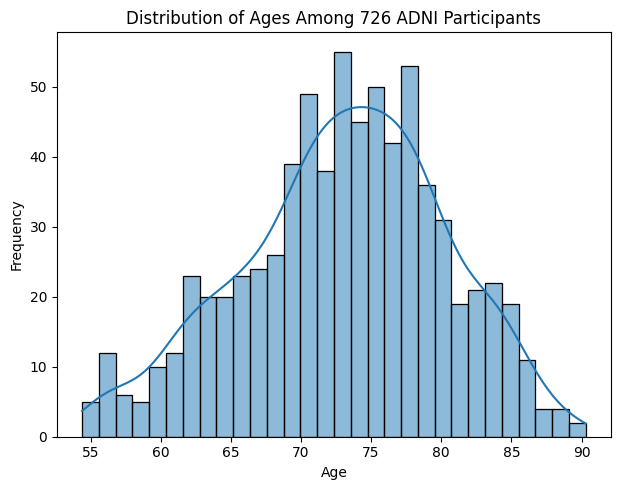

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
%matplotlib inline

# Use seaborn's clean theme

# Plot
plt.figure(figsize=(12, 5))

# Plot 1: Age distribution
plt.subplot(1, 2, 1)
sns.histplot(ages, kde=True, bins=30)
plt.title("Distribution of Ages Among 726 ADNI Participants")
plt.xlabel("Age")
plt.ylabel("Frequency")


plt.tight_layout()

plt.savefig('adni_age_dist.pdf', bbox_inches="tight")
plt.savefig('adni_age_dist.png', bbox_inches="tight")

plt.show()
